In [1]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
# Import CSV file
import warnings
warnings.filterwarnings ("ignore", category = UserWarning)
# Import the Pandas package.
import pandas as pd

# Create a variable named data_file_name to hold the name of the data file.
data_file_name = "spotify_songs.csv"

# Load the data file into a Pandas DataFrame.
df = pd.read_csv(data_file_name)


# Verify the DataFrame contents by printing the first 5 rows of data.
df.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [4]:
# Shape of the dataset
shape = df.shape
print(shape)

unique_rows = df["track_id"].unique().shape[0]
print(unique_rows)

(32833, 23)
28356


In [5]:
# Number of null values in each column
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [6]:
# Save Column names
col_names = df.columns

In [7]:
# Discretize Popularity of each song
# create blank column of zeroes
col = np.zeros((shape[0],1))
df_popularity_category = pd.DataFrame(col)
print(type(df_popularity_category))

# concatenate the dataframes
df = pd.concat([df,df_popularity_category], axis = 1)

df.head(5)

<class 'pandas.core.frame.DataFrame'>


track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... loudness  mode  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -2.634     1   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.969     1   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.432     0   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.778     1   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms    0  
0       194754  0.0  
1       162600  0.0  
2       176616  0.0  
3       169093  0.0  
4       189052  0.0  

[5 rows x 24 columns]

In [8]:
median_popularity = df["track_popularity"].median()
df["popularity_category"] = (df["track_popularity"] > median_popularity).astype(int)
df.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... mode  speechiness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.0583   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.0373   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    0       0.0742   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.1020   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...    1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.1020          0.000000    0.0653    0.518  122.036       194754   
1        0.0724          0.004210    0.3570    0.693   99.972       162600   
2        0.0794          0.000023    0.1100    0.613  124.008       176616   
3        0.0287          0.000009    0.2040    0.277  121.956       169093   
4        0.0803          0.000000    0.0833    0.725  123.976       189052   

     0  popularity_category  
0  0.0                    1  
1  0.0                    1  
2  0.0                    1  
3  0.0                    1  
4  0.0                    1  

[5 rows x 25 columns]

In [9]:
# Start Data Preprocessing

# Find features to remove:
# Don't need playlist data: playlist_name, playlist_id, playlist_genre, playlist_subgenre

featuresToRemove = []
featuresToRemove.append("playlist_name")
featuresToRemove.append("playlist_id")

for featureToRemove in featuresToRemove:
    del df[featureToRemove]


In [10]:
 df.head(5)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_genre playlist_subgenre  danceability  ...  mode  speechiness  \
0            pop         dance pop         0.748  ...     1       0.0583   
1            pop         dance pop         0.726  ...     1       0.0373   
2            pop         dance pop         0.675  ...     0       0.0742   
3            pop         dance pop         0.718  ...     1       0.1020   
4            pop         dance pop         0.650  ...     1       0.0359   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.1020          0.000000    0.0653    0.518  122.036       194754   
1        0.0724          0.004210    0.3570    0.693   99.972       162600   
2        0.0794          0.000023    0.1100    0.613  124.008       176616   
3        0.0287          0.000009    0.2040    0.277  121.956       169093   
4        0.0803          0.000000    0.0833    0.725  123.976       189052   

     0  popularity_category  
0  0.0                    1  
1  0.0                    1  
2  0.0                    1  
3  0.0                    1  
4  0.0                    1  

[5 rows x 23 columns]

In [11]:
# find the number of duplicate track IDs
ids = df["track_id"]

id_counts = ids.value_counts()
duplicated_ids = id_counts[id_counts > 1]
duplicated_track_ids = duplicated_ids.index

# now find full rows of duplicated IDs
condition = df["track_id"].isin(duplicated_track_ids)
duplicated_rows = df[condition]
duplicated_rows = duplicated_rows.sort_values(by = "track_id")
duplicated_rows.head(60)


track_id                               track_name  \
32084  00Gu3RMpDW2vO9PjlMVFDL            Hide Away (feat. Envy Monroe)   
28696  00Gu3RMpDW2vO9PjlMVFDL            Hide Away (feat. Envy Monroe)   
23850  00QyLmjxaSEE8qIZQjBXBj               We Own It (Fast & Furious)   
28968  00QyLmjxaSEE8qIZQjBXBj               We Own It (Fast & Furious)   
9387   00QyLmjxaSEE8qIZQjBXBj               We Own It (Fast & Furious)   
7853   00ReeHCY0FQUyuAUyPJdnk          Ain't No Future In Yo' Frontin'   
9345   00ReeHCY0FQUyuAUyPJdnk          Ain't No Future In Yo' Frontin'   
3124   00WIXhVVhswHuS6dlkScuw                                      Hot   
14626  00WIXhVVhswHuS6dlkScuw                                      Hot   
18487  00i0O74dXdaKKdCrqHnfXm                             La Mordidita   
21198  00i0O74dXdaKKdCrqHnfXm                             La Mordidita   
1903   00qOE7OjRl0BpYiCiweZB2                            Juke Box Hero   
12529  00qOE7OjRl0BpYiCiweZB2                            Juke Box Hero   
15244  01R0Xdwje645C6xFCnMRvm                         Talk Dirty To Me   
12979  01R0Xdwje645C6xFCnMRvm                         Talk Dirty To Me   
121    01iyINEYgPQ7ThMZuHUsqS                               First Love   
17491  01iyINEYgPQ7ThMZuHUsqS                               First Love   
12828  02138lFv3Bzncr6ScNbLAF                         Rattle Your Cage   
15159  02138lFv3Bzncr6ScNbLAF                         Rattle Your Cage   
4953   0240T0gP9w6xEgIciBrfVF                            Talk Is Cheap   
26173  0240T0gP9w6xEgIciBrfVF                            Talk Is Cheap   
4169   02CygBCQOIyEuhNZqHHcNx                       It Runs Through Me   
25425  02CygBCQOIyEuhNZqHHcNx                       It Runs Through Me   
2703   02M6vucOvmRfMxTXDUwRXu                                     7/11   
22268  02M6vucOvmRfMxTXDUwRXu                                     7/11   
7325   02M6vucOvmRfMxTXDUwRXu                                     7/11   
23061  02M6vucOvmRfMxTXDUwRXu                                     7/11   
214    02itaCXOdC54J0ISjqqFAp          All Around The World (La La La)   
29639  02itaCXOdC54J0ISjqqFAp          All Around The World (La La La)   
18896  02lGHA7bFFplYLihnUWTx8                                  Tequila   
17611  02lGHA7bFFplYLihnUWTx8                                  Tequila   
27762  02q7qbOYbE89NMFEtOklcc                                    Unity   
28409  02q7qbOYbE89NMFEtOklcc                                    Unity   
31530  02q7qbOYbE89NMFEtOklcc                                    Unity   
31042  037yW9RzsLze4OmBYmcH4G        Save My Night - BlasterJaxx Remix   
27979  037yW9RzsLze4OmBYmcH4G        Save My Night - BlasterJaxx Remix   
26909  03m9WRVBzoxyTeKblvLvpR                         You Got The Love   
29965  03m9WRVBzoxyTeKblvLvpR                         You Got The Love   
6012   03tqyYWC9Um2ZqU0ZN849H      No Hands (feat. Roscoe Dash & Wale)   
7523   03tqyYWC9Um2ZqU0ZN849H      No Hands (feat. Roscoe Dash & Wale)   
23363  04KTF78FFg8sOHC1BADqbY                             Hot In Herre   
7236   04KTF78FFg8sOHC1BADqbY                             Hot In Herre   
6315   04MLEeAMuV9IlHEsD8vF6A                               No Stylist   
9424   04MLEeAMuV9IlHEsD8vF6A                               No Stylist   
11228  04MLEeAMuV9IlHEsD8vF6A                               No Stylist   
4683   04ZTP5KsCypmtCmQg5tH9R                               I'm a Mess   
23280  04ZTP5KsCypmtCmQg5tH9R                               I'm a Mess   
1480   04ZTP5KsCypmtCmQg5tH9R                               I'm a Mess   
20659  04aAxqtGp5pv12UXAg4pkq                                Centuries   
1898   04aAxqtGp5pv12UXAg4pkq                                Centuries   
29979  04wllvXvWOkZS5NugzeS8O                                     Lost   
27251  04wllvXvWOkZS5NugzeS8O                                     Lost   
30800  05CwHjIk71RXVU40boRMnR                            Call You Mine   
70     05CwHjIk71RXVU40bo

In [12]:
# now we must drop the duplicates now that we've identified them
df = df.drop_duplicates(subset = "track_id", inplace = False)

# make sure unique rows match 
print(f"Unique rows - rows when duplicates dropped = {unique_rows - df.shape[0]}")


Unique rows - rows when duplicates dropped = 0


In [13]:
df.nunique()

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
0                               1
popularity_category             2
dtype: int64

In [14]:
df["mode"].unique()

array([1, 0])

In [15]:
# figuring out how to parse album/song release dates
print(type(df["track_album_release_date"]))
print(df["track_album_release_date"][21][:4])
print(df["track_album_release_date"][21][5:7])
print(df["track_album_release_date"][21][8:10])

<class 'pandas.core.series.Series'>
2019
08
23


In [16]:
df["date_len"] = df["track_album_release_date"].astype(str).str.len()
len = df["date_len"]
year_only = len[len != 10]
year_only[year_only != 4]

3446     7
3524     7
7614     7
11740    7
11877    7
12208    7
12283    7
12512    7
12538    7
12764    7
12789    7
13135    7
13227    7
13365    7
13395    7
13408    7
13480    7
13576    7
14504    7
15266    7
15408    7
15990    7
22473    7
22744    7
22759    7
Name: date_len, dtype: int64

In [71]:
# Since we have varying levels of date data we only keep year of release
df["Release Year"] = ""
for i in range(unique_rows):
    df.at[df.index[i], "Release Year"] = df["track_album_release_date"].iloc[i][:4]
    

KeyError: 'track_album_release_date'

In [18]:
# Don't need the full date or date_len columns anymore
del df["track_album_release_date"]
del df["date_len"]

In [19]:
df.columns

Index([           'track_id',          'track_name',        'track_artist',
          'track_popularity',      'track_album_id',    'track_album_name',
            'playlist_genre',   'playlist_subgenre',        'danceability',
                    'energy',                 'key',            'loudness',
                      'mode',         'speechiness',        'acousticness',
          'instrumentalness',            'liveness',             'valence',
                     'tempo',         'duration_ms',                     0,
       'popularity_category',        'Release Year'],
      dtype='object')

In [20]:
df = df.rename(columns = {'track_id': 'ID', 
                     'track_name' : 'Title',
                     'track_artist': 'artist',
                     'track_album_id': 'Album ID',
                     'track_album_name': 'Album',
                     'playlist_genre': 'genre',
                     'playlist_subgenre': 'subgenre',
                     'danceability': 'danceability',
                     'energy': 'energy',
                     'key': 'key',
                     'loudness': 'loudness',
                     'mode': 'mode',
                     'speechiness': 'speechiness',
                     'acousticness': 'acousticness',
                     'instrumentalness': 'instrumentalness',
                     'liveness': 'liveness',
                     'valence': 'valence',
                     'tempo': 'tempo',
                     'duration_ms': 'Song Length',
                     'track_popularity': 'Popularity',
                     'popularity_category': 'popularity_category',
                     'Release Year': 'Release Year'
                    })
                  

In [21]:
df = df[['ID',
         'Title',
         'artist',
         'Album ID',
         'Album',
         'genre',
         'subgenre',
         'danceability',
         'energy',
         'key',
         'loudness',
         'mode',
         'speechiness',
         'acousticness',
         'instrumentalness', 
         'liveness',
         'valence',
         'tempo',
         'Song Length',
         'Popularity',
         'popularity_category',
         'Release Year']]

In [22]:
df.describe()

danceability        energy           key      loudness          mode  \
count  28356.000000  28356.000000  28356.000000  28356.000000  28356.000000   
mean       0.653372      0.698388      5.368000     -6.817696      0.565489   
std        0.145785      0.183503      3.613904      3.036243      0.495701   
min        0.000000      0.000175      0.000000    -46.448000      0.000000   
25%        0.561000      0.579000      2.000000     -8.309250      0.000000   
50%        0.670000      0.722000      6.000000     -6.261000      1.000000   
75%        0.760000      0.843000      9.000000     -4.709000      1.000000   
max        0.983000      1.000000     11.000000      1.275000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  28356.000000  28356.000000      28356.000000  28356.000000   
mean       0.107954      0.177176          0.091117      0.190958   
std        0.102556      0.222803          0.232548      0.155894   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.041000      0.014375          0.000000      0.092600   
50%        0.062600      0.079700          0.000021      0.127000   
75%        0.133000      0.260000          0.006570      0.249000   
max        0.918000      0.994000          0.994000      0.996000   

            valence        tempo    Song Length    Popularity  \
count  28356.000000  28356.00000   28356.000000  28356.000000   
mean       0.510387    120.95618  226575.967026     39.329771   
std        0.234340     26.95456   61078.450819     23.702376   
min        0.000000      0.00000    4000.000000      0.000000   
25%        0.329000     99.97200  187742.000000     21.000000   
50%        0.512000    121.99300  216933.000000     42.000000   
75%        0.695000    133.99900  254975.250000     58.000000   
max        0.991000    239.44000  517810.000000    100.000000   

       popularity_category  
count         28356.000000  
mean              0.449922  
std               0.497495  
min               0.000000  
25%               0.000000  
50%               0.000000  
75%               1.000000  
max               1.000000

In [23]:
df_num = df[['danceability',
             'energy',
             'key',
             'loudness',
             'mode',
             'speechiness',
             'acousticness',
             'instrumentalness',
             'liveness',
             'valence',
             'tempo',
             'Song Length',
             'Popularity']]

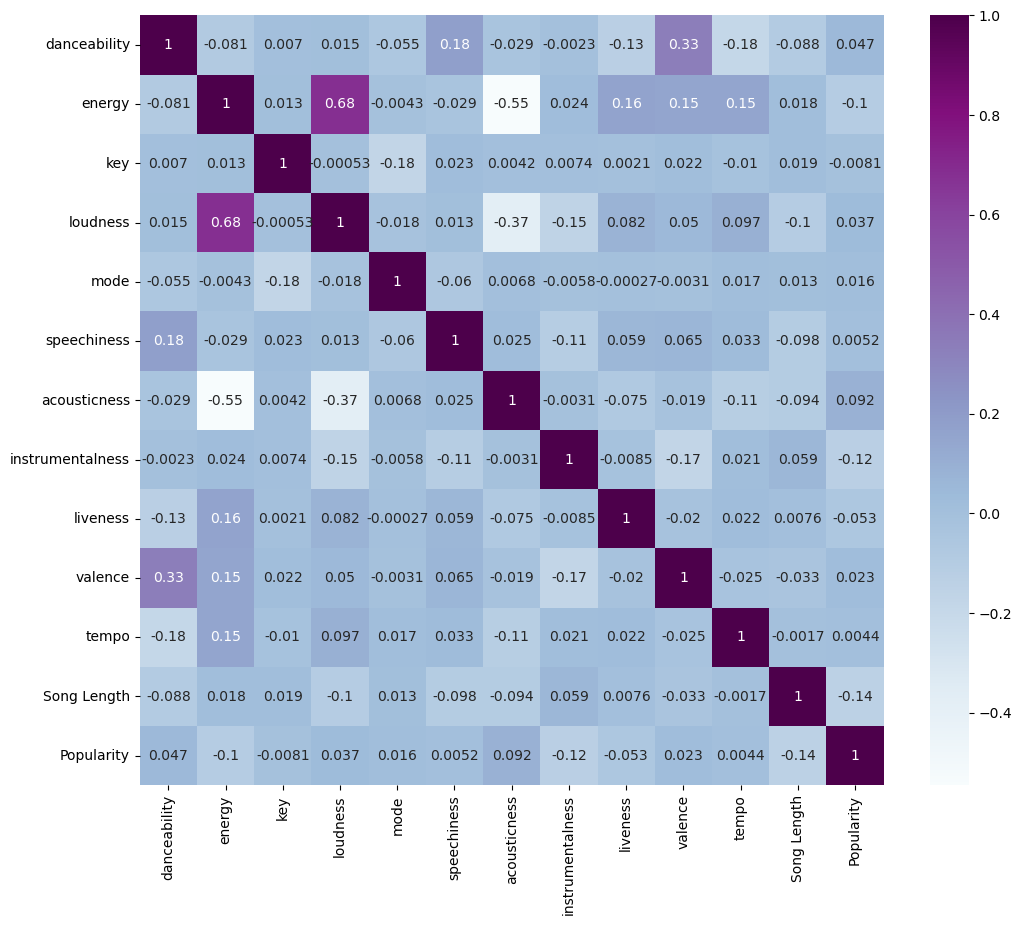

In [24]:
# Check for collinearity of numeric data
correlations = df_num.corr()


plt.figure(figsize = (12,10))
sns.heatmap(correlations, annot = True, cmap = "BuPu")
plt.show()

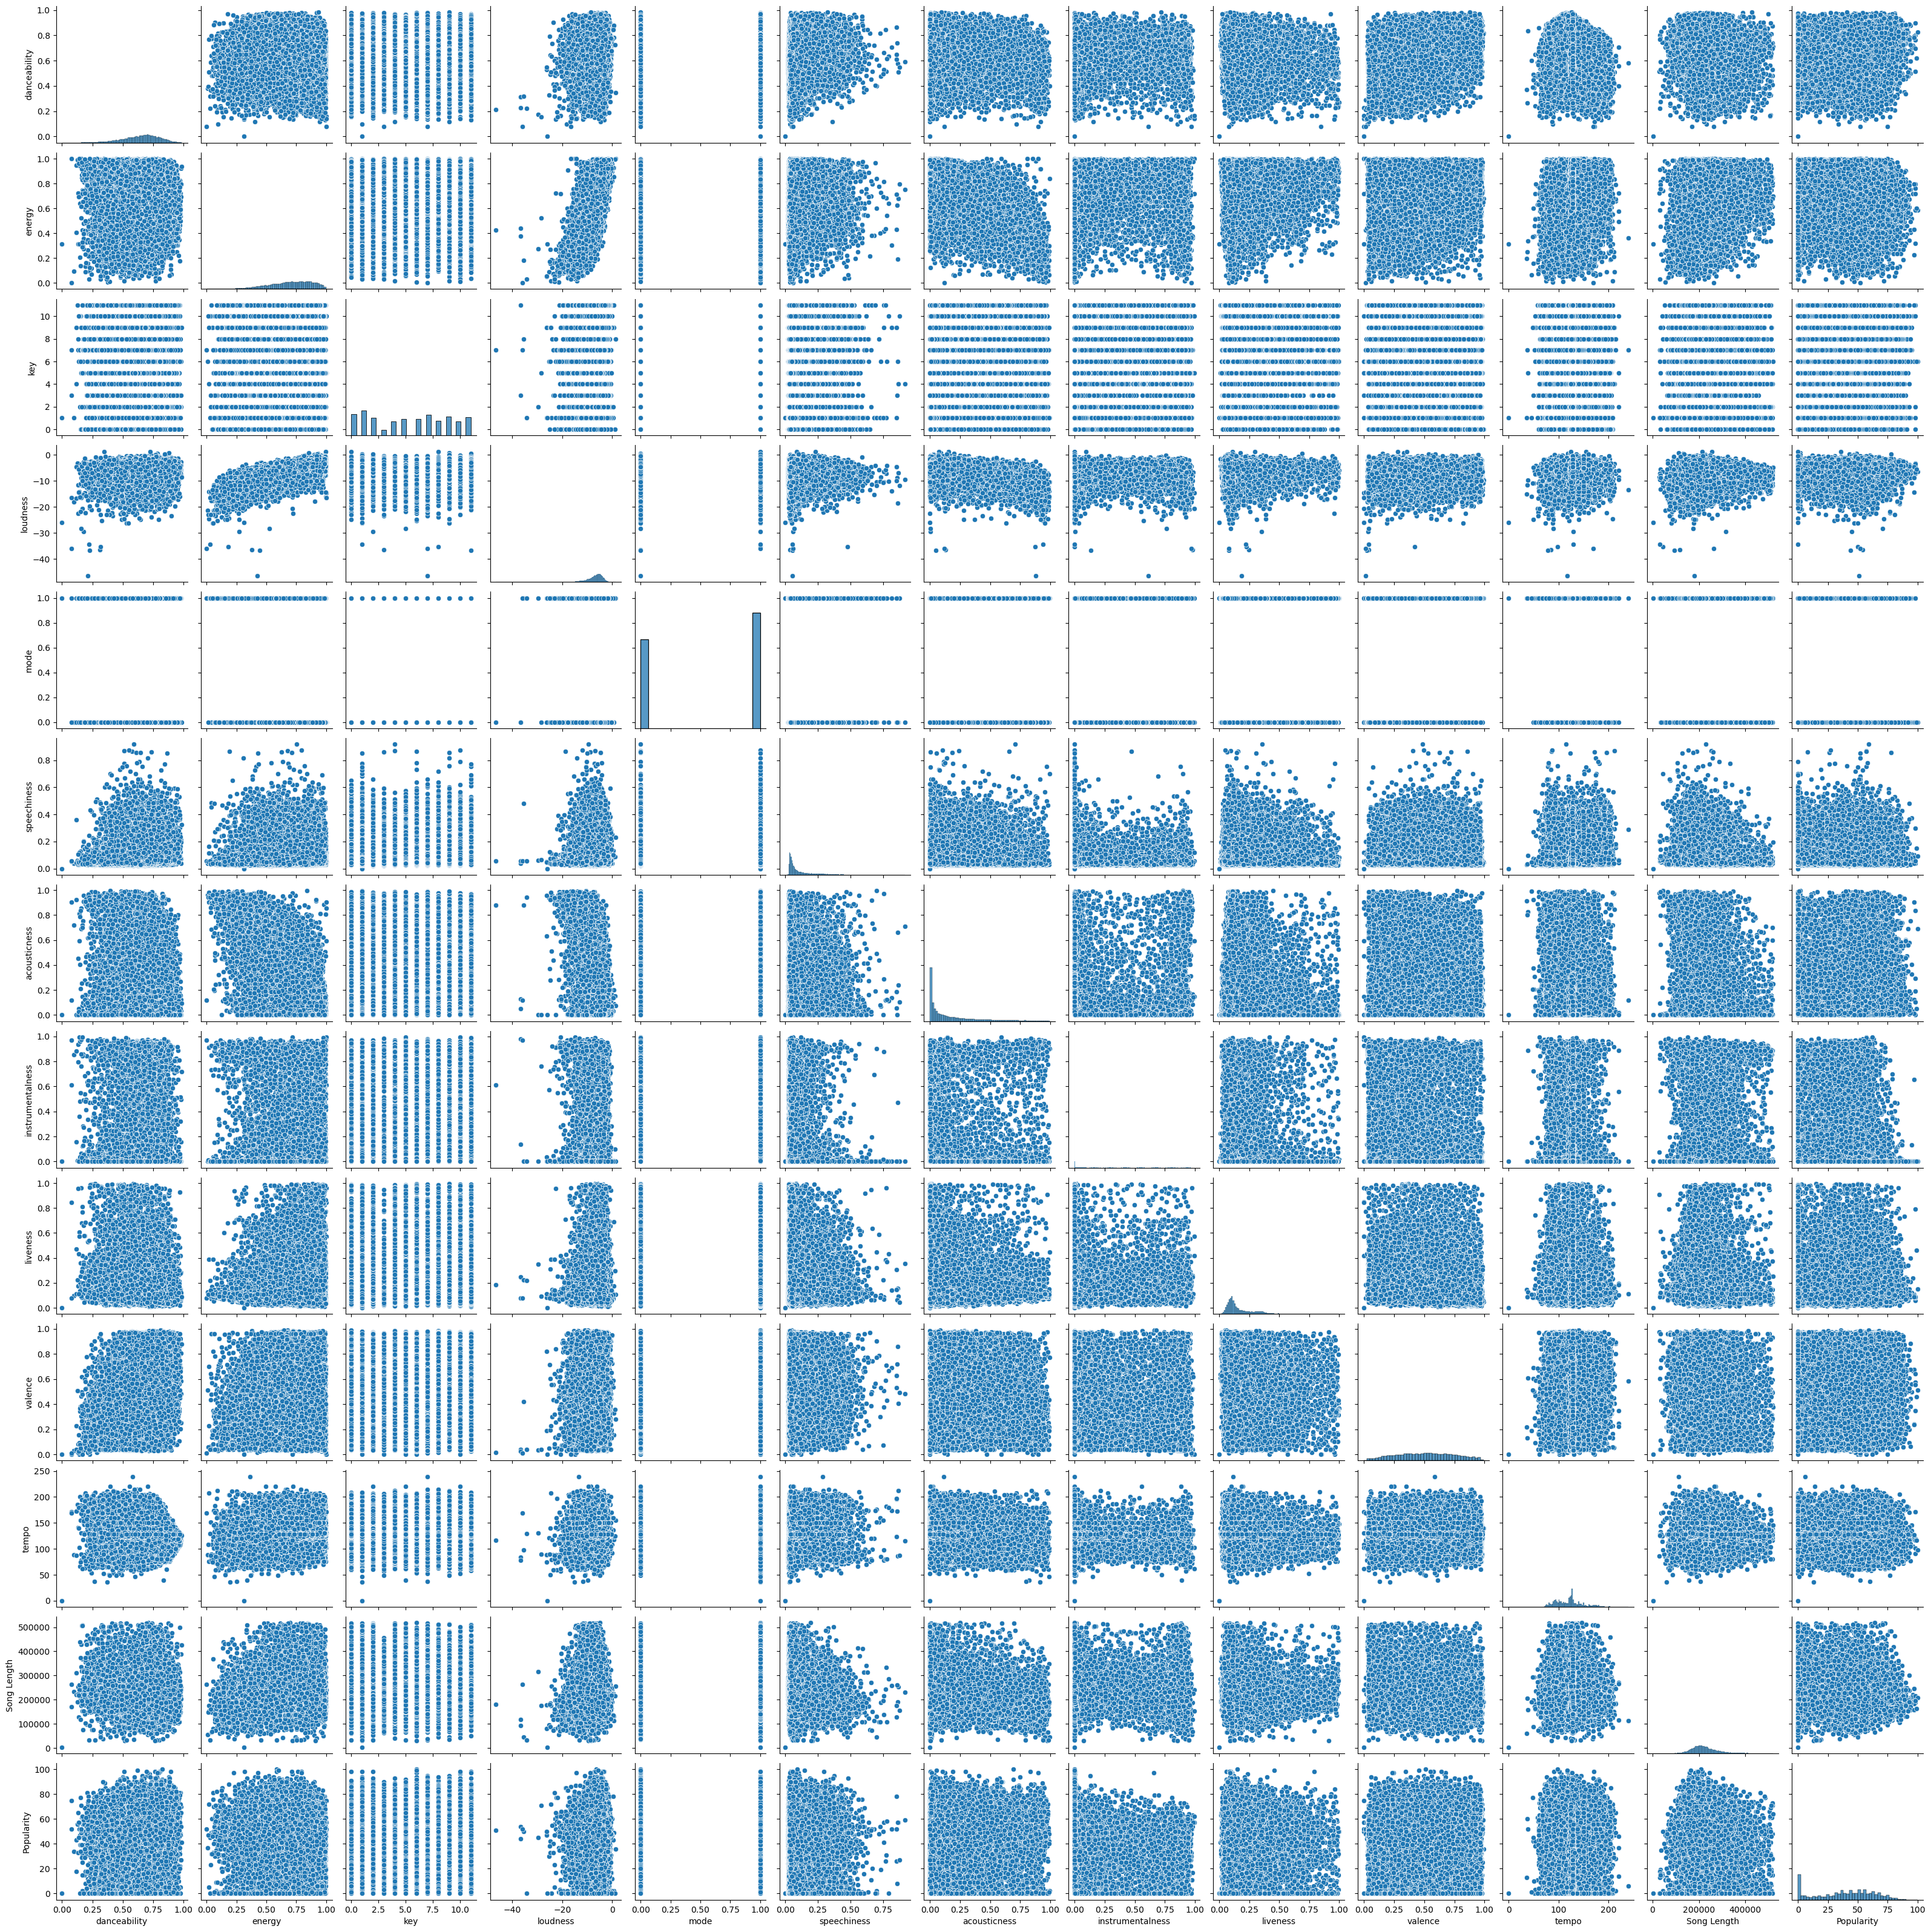

In [25]:
sns.pairplot(df_num)

In [26]:
# Remove all NaN data
df.dropna(inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28352 entries, 0 to 32832
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   28352 non-null  object 
 1   Title                28352 non-null  object 
 2   artist               28352 non-null  object 
 3   Album ID             28352 non-null  object 
 4   Album                28352 non-null  object 
 5   genre                28352 non-null  object 
 6   subgenre             28352 non-null  object 
 7   danceability         28352 non-null  float64
 8   energy               28352 non-null  float64
 9   key                  28352 non-null  int64  
 10  loudness             28352 non-null  float64
 11  mode                 28352 non-null  int64  
 12  speechiness          28352 non-null  float64
 13  acousticness         28352 non-null  float64
 14  instrumentalness     28352 non-null  float64
 15  liveness             28352 non-null  floa

In [28]:
# Data is now ready for analysis

In [29]:
artist_counts = df["artist"].value_counts()
famous = artist_counts[artist_counts > 50]
famous.index

Index(['Queen', 'Martin Garrix', 'Don Omar', 'David Guetta',
       'Dimitri Vegas & Like Mike', 'Drake', 'Hardwell', 'The Chainsmokers',
       'Logic', 'Guns N' Roses', '2Pac', 'The Weeknd', 'Wisin & Yandel'],
      dtype='object', name='artist')

In [30]:
def artist_plot(artist, df):
    artist_name = artist  
    filtered_data = df[df['artist'] == artist_name]

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_data['Release Year'], filtered_data['Popularity'], color='blue')
    plt.title(f'{artist_name} - Popularity Score of Songs')
    plt.xlabel('Release Year')
    plt.ylabel('Popularity Score')
    plt.xticks(rotation=90)  # Rotate song names for readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


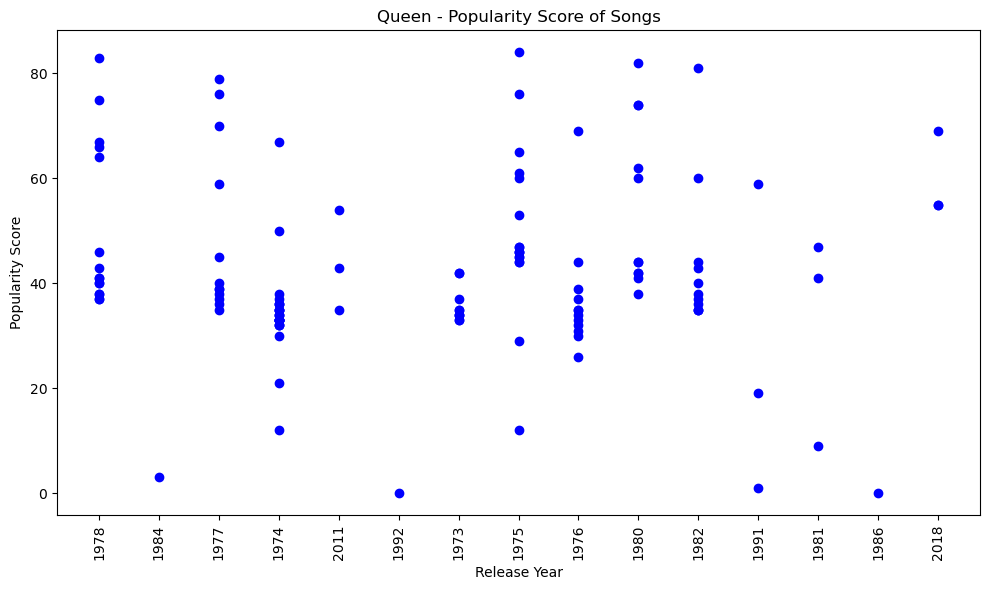

In [31]:
artist_plot("Queen", df)

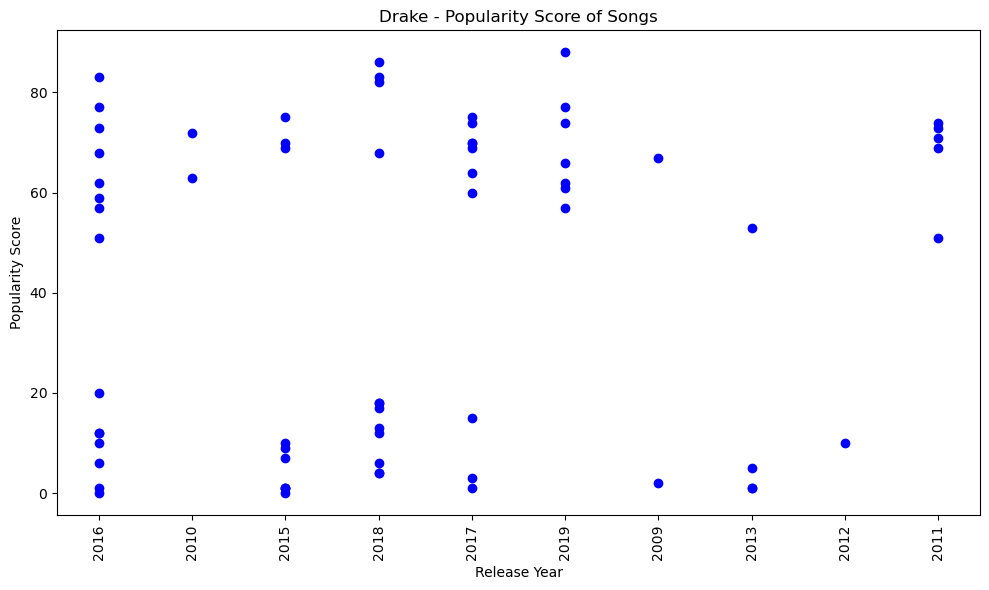

In [32]:
artist_plot("Drake", df)

In [33]:
def test_artist_affect(df):
   
    # Group the data by artist and extract popularity scores for each artist
    grouped_data = [group['Popularity'].values for _, group in df.groupby('artist')]

    # Perform ANOVA test
    f_statistic, p_value = stats.f_oneway(*grouped_data)

    # Output the results
    print(f'F-statistic: {f_statistic}')
    print(f'P-value: {p_value}')
    
    # Interpret the results
    if p_value < 0.05:
        print('There is significant evidence that the artist affects the popularity score.')
    else:
        print('There is no significant evidence that the artist affects the popularity score.')


test_artist_affect(df)


F-statistic: 1.9805636759344931
P-value: 0.0
There is significant evidence that the artist affects the popularity score.


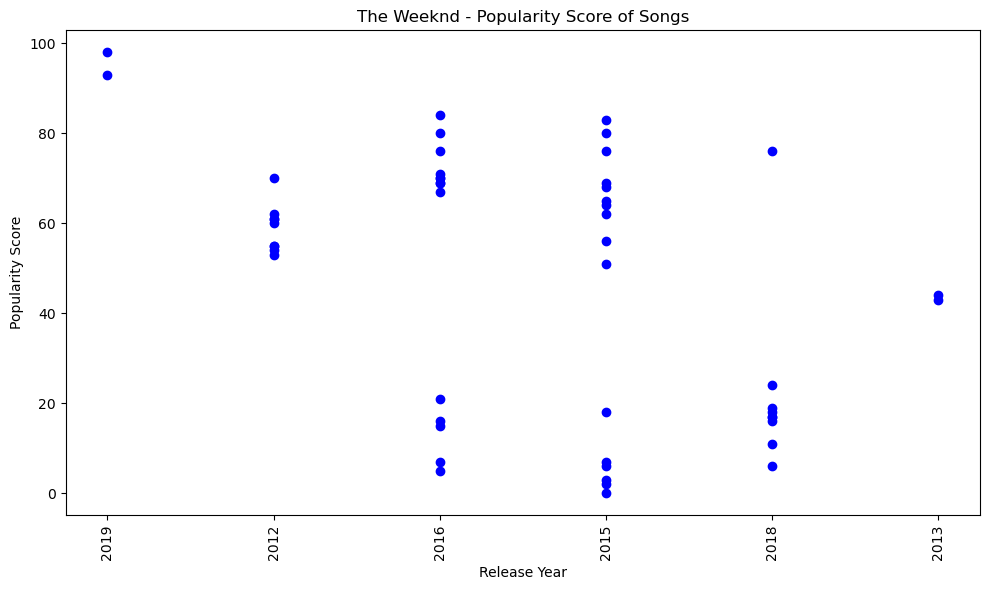

In [34]:
artist_plot("The Weeknd", df)

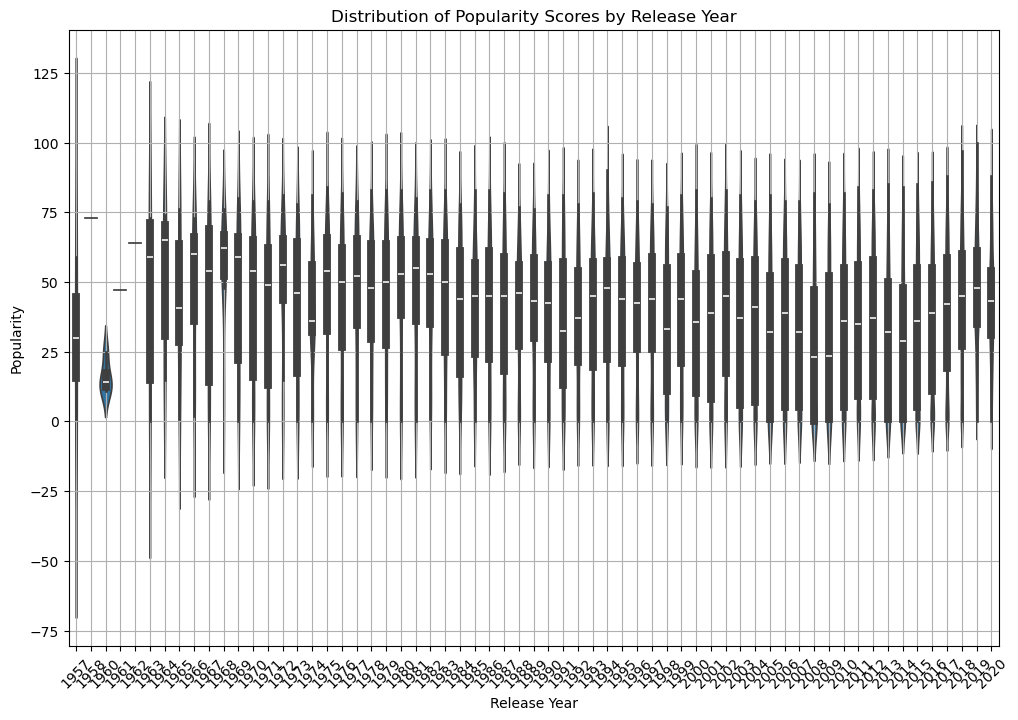

In [35]:
plt.figure(figsize=(12, 8))

# Create a violin plot to show the distribution of 'Popularity' for each 'Release Year' in sorted order
sns.violinplot(x='Release Year', y='Popularity', data=df, order=sorted(df['Release Year'].unique()))

plt.title('Distribution of Popularity Scores by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




In [36]:
# Create a DF called y with all rows and just the target column
# Reshape your into a 1-dimensional NumPy array object
df_log_reg = df[[ "danceability",
         "energy",
         "key",
         "loudness",
         "mode",
         "speechiness",
         "acousticness",
         "instrumentalness",
         "liveness",
         "valence",
         "tempo",
         "Song Length",
         "popularity_category"]]

y = df_log_reg.iloc[:, -1:].values.reshape(-1, )
print("y:", y.shape)
print(type(y))
print()

# create a DF called X with all rows and all columns before target
X = df_log_reg.iloc[:, :-1]
print("X shape: ", X.shape)
print(type(X))







y: (28352,)
<class 'numpy.ndarray'>

X shape:  (28352, 12)
<class 'pandas.core.frame.DataFrame'>


In [37]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# create an instance of sk;earns LogisticRegression
model = LogisticRegression(max_iter = 200, multi_class = 'multinomial', solver = 'lbfgs')

# remove intercept column from independent variables in X
X = X.iloc[:, :-1]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
print(X_scaled)
print()

       danceability    energy       key  loudness      mode  speechiness  \
0          0.649057  1.185948  0.175052  1.377883  0.876494    -0.484071   
1          0.498153  0.635555  1.558684  0.608875  0.876494    -0.688858   
2          0.148330  1.267690 -1.208579  1.115070 -1.140909    -0.329017   
3          0.443279  1.262240  0.451779  1.001119  0.876494    -0.057918   
4         -0.023151  0.733645 -1.208579  0.706689  0.876494    -0.702510   
...             ...       ...       ...       ...       ...          ...   
28347     -1.545909  1.218645 -0.931853  1.647942  0.876494    -0.139833   
28348     -0.901138  0.477521 -1.485305  0.775851  0.876494    -0.643025   
28349     -0.853123  0.668251  0.175052  0.631929 -1.140909    -0.583539   
28350     -0.187774  1.033364 -0.931853  1.138453  0.876494     0.010344   
28351     -0.345537  1.011566 -0.101674  0.739953 -1.140909    -0.677156   

       acousticness  instrumentalness  liveness   valence     tempo  
0         -0.3374

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10, shuffle = True)# create cross-tabulation and look at the percentage of each category for the target variable
count_train = pd.crosstab(index = y_train, columns = "Percent")

print("Training Target Variable:")
print()
print(count_train / count_train.sum())
print()

count_test = pd.crosstab(index = y_test, columns = "Percent")

print("Testing Target Variable:")
print()
print(count_test / count_test.sum())
print()

Training Target Variable:

col_0   Percent
row_0          
0      0.547969
1      0.452031

Testing Target Variable:

col_0   Percent
row_0          
0      0.554785
1      0.445215



In [39]:
# Fit the model to the training data.
model.fit(X_train, y_train)



# Output the y-intercept and regression coefficients.
print("Intercept :" + str(model.intercept_))
print("Coefficients: " + str(model.coef_))
print()


# Create a new DataFrame called df_results.
# Add the predictor names and coefficient values to df_results.
# Take the exponents of the coefficients to create the odds ratios.
# Add the odds ratio values to df_results.
my_dictionary = {
    "predictor" : X_train.columns,
    "coefficient": model.coef_[0]
}
df_results = pd.DataFrame(my_dictionary)

df_results["odds_ratios"] = np.exp(df_results["coefficient"])


# Sort the results by odds ratio descending.
# Output the results.

df_results = df_results.sort_values("odds_ratios", ascending = False)
df_results



Intercept :[-0.10243594]
Coefficients: [[ 0.02152963 -0.17891547  0.00335629  0.1622179   0.01531719 -0.0129159
   0.04643728 -0.08183558 -0.01856358  0.02952272  0.03665443]]



predictor  coefficient  odds_ratios
3           loudness     0.162218     1.176116
6       acousticness     0.046437     1.047532
10             tempo     0.036654     1.037334
9            valence     0.029523     1.029963
0       danceability     0.021530     1.021763
4               mode     0.015317     1.015435
2                key     0.003356     1.003362
5        speechiness    -0.012916     0.987167
8           liveness    -0.018564     0.981608
7   instrumentalness    -0.081836     0.921423
1             energy    -0.178915     0.836177

In [40]:
y_predictions = model.predict(X_test)


# Compare y_test to y_predictions by creating a new DataFrame called df_compare with y_test in one (1) column and y_predictions in another column.
data = {
    "actual": y_test,
    "predicted": y_predictions
}
df_compare = pd.DataFrame(data)
df_compare.head(10)

actual  predicted
0       1          1
1       0          0
2       0          1
3       1          1
4       1          0
5       0          0
6       1          0
7       0          1
8       1          0
9       1          0

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predictions))


              precision    recall  f1-score   support

           0       0.60      0.75      0.67      4719
           1       0.54      0.36      0.43      3787

    accuracy                           0.58      8506
   macro avg       0.57      0.56      0.55      8506
weighted avg       0.57      0.58      0.56      8506



In [42]:
df['loud_minus_energy'] = df['loudness'] - df['energy']
df['acoustic_vs_instr'] = df['acousticness'] - df['instrumentalness']
df['loud_acoustic_product'] = df['loudness'] * df['acousticness']
df['inv_energy'] = 1 / (df['energy'] + 1e-5)
df['valence_tempo'] = df['valence'] * df['tempo']

df_new = df[['loud_minus_energy','acoustic_vs_instr','loud_acoustic_product','inv_energy','valence_tempo','key','danceability','speechiness','mode','Song Length','popularity_category']]


In [43]:
model2 = LogisticRegression(max_iter = 200, multi_class = 'multinomial', solver = 'lbfgs')

In [44]:
y = df_new.iloc[:, -1:].values.reshape(-1, )
print("y:", y.shape)
print(type(y))
print()

# create a DF called X with all rows and all columns before target
X = df_new.iloc[:, :-1]
print("X shape: ", X.shape)
print(type(X))

y: (28352,)
<class 'numpy.ndarray'>

X shape:  (28352, 10)
<class 'pandas.core.frame.DataFrame'>


In [45]:
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
print(X_scaled)
print()

       loud_minus_energy  acoustic_vs_instr  loud_acoustic_product  \
0               1.360932           0.049407               0.484794   
1               0.594364          -0.055407               0.447710   
2               1.081962          -0.020727               0.483233   
3               0.963579          -0.177859               0.550030   
4               0.690099          -0.017865               0.441438   
...                  ...                ...                    ...   
28347           1.640245          -0.029335               0.537604   
28348           0.778286          -0.274738               0.591067   
28349           0.616325           0.068005               0.378770   
28350           1.121079          -0.635961               0.583337   
28351           0.707256          -1.323521               0.593926   

       inv_energy  valence_tempo       key  danceability  speechiness  \
0       -0.022582       0.051058  0.175052      0.649057    -0.484071   
1       -0.01

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10, shuffle = True)# create cross-tabulation and look at the percentage of each category for the target variable
count_train = pd.crosstab(index = y_train, columns = "Percent")

print("Training Target Variable:")
print()
print(count_train / count_train.sum())
print()

count_test = pd.crosstab(index = y_test, columns = "Percent")

print("Testing Target Variable:")
print()
print(count_test / count_test.sum())
print()

Training Target Variable:

col_0   Percent
row_0          
0      0.547969
1      0.452031

Testing Target Variable:

col_0   Percent
row_0          
0      0.554785
1      0.445215



In [47]:
model2.fit(X_train, y_train)



# Output the y-intercept and regression coefficients.
print("Intercept :" + str(model2.intercept_))
print("Coefficients: " + str(model2.coef_))
print()


# Create a new DataFrame called df_results.
# Add the predictor names and coefficient values to df_results.
# Take the exponents of the coefficients to create the odds ratios.
# Add the odds ratio values to df_results.
my_dictionary = {
    "predictor" : X_train.columns,
    "coefficient": model2.coef_[0]
}
df_results = pd.DataFrame(my_dictionary)

df_results["odds_ratios"] = np.exp(df_results["coefficient"])


# Sort the results by odds ratio descending.
# Output the results.

df_results = df_results.sort_values("odds_ratios", ascending = False)
df_results



Intercept :[-0.0883006]
Coefficients: [[ 6.62847167e-02  1.39628222e-01  3.83794418e-02  2.34756361e+00
   2.16869635e-02  2.24259121e-03  2.94896491e-02 -1.99390399e-02
   1.42820690e-02 -9.62607172e-02]]



predictor  coefficient  odds_ratios
3             inv_energy     2.347564    10.460054
1      acoustic_vs_instr     0.139628     1.149846
0      loud_minus_energy     0.066285     1.068531
2  loud_acoustic_product     0.038379     1.039125
6           danceability     0.029490     1.029929
4          valence_tempo     0.021687     1.021924
8                   mode     0.014282     1.014385
5                    key     0.002243     1.002245
7            speechiness    -0.019939     0.980258
9            Song Length    -0.096261     0.908227

In [48]:
y_predictions = model2.predict(X_test)


# Compare y_test to y_predictions by creating a new DataFrame called df_compare with y_test in one (1) column and y_predictions in another column.
data = {
    "actual": y_test,
    "predicted": y_predictions
}
df_compare = pd.DataFrame(data)
df_compare.head(10)

actual  predicted
0       1          1
1       0          0
2       0          1
3       1          1
4       1          0
5       0          0
6       1          0
7       0          0
8       1          0
9       1          0

In [49]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.59      0.77      0.67      4719
           1       0.54      0.34      0.41      3787

    accuracy                           0.58      8506
   macro avg       0.57      0.55      0.54      8506
weighted avg       0.57      0.58      0.56      8506



In [50]:
# Let's consider top 3 positive features and top 3 negative features
# Positive: inv_energy, loudness, acoustic_vs_instr
# Negative: energy, song length, liveness
df_final = df[['inv_energy', 'loudness', 'acoustic_vs_instr', 'energy', 'Song Length', 'liveness','popularity_category']]

In [51]:
model3 = LogisticRegression(max_iter = 200, multi_class = 'multinomial', solver = 'lbfgs')

In [52]:
y = df_final.iloc[:, -1:].values.reshape(-1, )
print("y:", y.shape)
print(type(y))
print()

# create a DF called X with all rows and all columns before target
X = df_final.iloc[:, :-1]
print("X shape: ", X.shape)
print(type(X))

y: (28352,)
<class 'numpy.ndarray'>

X shape:  (28352, 6)
<class 'pandas.core.frame.DataFrame'>


In [53]:
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
print(X_scaled)
print()

       inv_energy  loudness  acoustic_vs_instr    energy  Song Length  \
0       -0.022582  1.377883           0.049407  1.185948    -0.520964   
1       -0.018370  0.608875          -0.055407  0.635555    -1.047386   
2       -0.023130  1.115070          -0.020727  1.267690    -0.817917   
3       -0.023094  1.001119          -0.177859  1.262240    -0.941083   
4       -0.019196  0.706689          -0.017865  0.733645    -0.614317   
...           ...       ...                ...       ...          ...   
28347   -0.022803  1.647942          -0.029335  1.218645    -0.363450   
28348   -0.016961  0.775851          -0.274738  0.477521     2.071787   
28349   -0.018650  0.631929           0.068005  0.668251    -0.269524   
28350   -0.021510  1.138453          -0.635961  1.033364     2.306102   
28351   -0.021352  0.739953          -1.323521  1.011566     1.816058   

       liveness  
0     -0.806073  
1      1.065178  
2     -0.519323  
3      0.083685  
4     -0.690604  
...         ...

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10, shuffle = True)

In [55]:
model3.fit(X_train, y_train)



# Output the y-intercept and regression coefficients.
print("Intercept :" + str(model3.intercept_))
print("Coefficients: " + str(model3.coef_))
print()


# Create a new DataFrame called df_results.
# Add the predictor names and coefficient values to df_results.
# Take the exponents of the coefficients to create the odds ratios.
# Add the odds ratio values to df_results.
my_dictionary = {
    "predictor" : X_train.columns,
    "coefficient": model3.coef_[0]
}
df_results = pd.DataFrame(my_dictionary)

df_results["odds_ratios"] = np.exp(df_results["coefficient"])


# Sort the results by odds ratio descending.
# Output the results.

df_results = df_results.sort_values("odds_ratios", ascending = False)
df_results


Intercept :[-0.10304979]
Coefficients: [[ 0.00419707  0.14531476  0.09011132 -0.14829699 -0.09264571 -0.0226359 ]]



predictor  coefficient  odds_ratios
1           loudness     0.145315     1.156404
2  acoustic_vs_instr     0.090111     1.094296
0         inv_energy     0.004197     1.004206
5           liveness    -0.022636     0.977618
4        Song Length    -0.092646     0.911516
3             energy    -0.148297     0.862175

In [56]:
y_predictions = model3.predict(X_test)


# Compare y_test to y_predictions by creating a new DataFrame called df_compare with y_test in one (1) column and y_predictions in another column.
data = {
    "actual": y_test,
    "predicted": y_predictions
}
df_compare = pd.DataFrame(data)
df_compare.head(10)

actual  predicted
0       1          1
1       0          1
2       0          1
3       1          0
4       1          0
5       0          1
6       1          0
7       0          0
8       1          0
9       1          0

In [57]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67      4719
           1       0.55      0.37      0.44      3787

    accuracy                           0.58      8506
   macro avg       0.57      0.56      0.55      8506
weighted avg       0.58      0.58      0.57      8506



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28352 entries, 0 to 32832
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     28352 non-null  object 
 1   Title                  28352 non-null  object 
 2   artist                 28352 non-null  object 
 3   Album ID               28352 non-null  object 
 4   Album                  28352 non-null  object 
 5   genre                  28352 non-null  object 
 6   subgenre               28352 non-null  object 
 7   danceability           28352 non-null  float64
 8   energy                 28352 non-null  float64
 9   key                    28352 non-null  int64  
 10  loudness               28352 non-null  float64
 11  mode                   28352 non-null  int64  
 12  speechiness            28352 non-null  float64
 13  acousticness           28352 non-null  float64
 14  instrumentalness       28352 non-null  float64
 15  livenes

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree_features = df[df.columns[2:]]
tree_features = tree_features[['genre', 'subgenre','danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'Song Length', 'Release Year', 'loud_minus_energy', 'acoustic_vs_instr', 'inv_energy', 'valence_tempo', 'popularity_category']]

columns_to_keep = ['danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'Song Length', 'Release Year', 'loud_minus_energy', 'acoustic_vs_instr', 'inv_energy', 'valence_tempo', 'popularity_category']
scaler = StandardScaler()
numerical_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                      'instrumentalness', 'liveness', 'valence', 'tempo', 'Song Length']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

genre_dummies = pd.get_dummies(tree_features["genre"], prefix = "genre")
subgenre_dummies = pd.get_dummies(tree_features["subgenre"], prefix = "subgenre")


tree_features = tree_features[columns_to_keep]



In [60]:
# Temporarily remove the target column
popularity_col = tree_features["popularity_category"]
tree_features = tree_features.drop(columns=["popularity_category"])

# Join dummy variables
tree_features = tree_features.join(genre_dummies.loc[:, "genre_2":])
tree_features = tree_features.join(subgenre_dummies.loc[:, "subgenre_2":])




In [61]:
# Add the target column back as the last column
tree_features["popularity_category"] = popularity_col


X = tree_features.iloc[:,:-1]
y = tree_features.iloc[:,-1:].values.reshape(-1,)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28352 entries, 0 to 32832
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   danceability                        28352 non-null  float64
 1   key                                 28352 non-null  int64  
 2   loudness                            28352 non-null  float64
 3   mode                                28352 non-null  int64  
 4   speechiness                         28352 non-null  float64
 5   acousticness                        28352 non-null  float64
 6   instrumentalness                    28352 non-null  float64
 7   liveness                            28352 non-null  float64
 8   valence                             28352 non-null  float64
 9   tempo                               28352 non-null  float64
 10  Song Length                         28352 non-null  int64  
 11  Release Year                        28352 non-

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, shuffle = True)
count_train = pd.crosstab(index = y_train, columns = "Percent")

print("Training Target Variable:")
print()
print(count_train / count_train.sum())
print()

count_test = pd.crosstab(index = y_test, columns = "Percent")

print("Testing Target Variable:")
print()
print(count_test / count_test.sum())
print()


Training Target Variable:

col_0   Percent
row_0          
0      0.551698
1      0.448302

Testing Target Variable:

col_0   Percent
row_0          
0      0.546085
1      0.453915



In [64]:
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)

In [65]:
clf = clf.fit(X_train, y_train)

In [66]:
y_pred = clf.predict(X_test)

In [67]:
data = {
    "actual": y_test,
    "predicted": y_pred
}
df_comp = pd.DataFrame(data)
df_comp.head(30)

actual  predicted
0        1          0
1        0          0
2        1          0
3        0          0
4        0          0
5        1          1
6        0          0
7        0          1
8        0          0
9        1          1
10       0          0
11       1          0
12       0          0
13       1          1
14       0          0
15       0          1
16       1          0
17       1          0
18       0          0
19       0          0
20       1          0
21       0          0
22       1          0
23       1          0
24       1          0
25       0          1
26       1          1
27       1          1
28       0          0
29       1          0

In [68]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.6177992005643076


In [69]:
print("Precision: ",precision_score(y_test, y_pred, pos_label = 1))

Precision:  0.6683222958057395


In [70]:
print("Recall: ", recall_score(y_test, y_pred, pos_label = 1))

Recall:  0.31364931364931364
